1️⃣ Normalization

    *Also called: Min-Max Scaling
    *Definition: Rescales feature values to a specific range, usually 0–1 (or -1 to 1).
    *Focus: Makes all values fit within a fixed range, preserving the relationships between them.
    
    Formula:
        
        Xnorm​= X-Xmin/(Xmax-Xmin)  #we used to apply formula on each value. we will get xmin=0 and xmax=1
        
 When to use:----
*Algorithms based on distance (KNN, K-Means, Neural Networks)
*When features have different units
*Effect: All values are between 0–1; magnitude differences are removed.

NOte:----
1.Effect on outliers
2. Used for:- Distance-based algorithms
3. Centers data ->  No  
4. Range after scaling->Fixed, usually 0–1

Different Normalisation Techniques:-
1. MinMaxscaling ->  Xnorm​= X-Xmin/(Xmax-Xmin)
2. Mean Normalisation -> Xnorm​= X-Xmean/(Xmax-Xmin) ( here we are doing mean centering ( mean will be 0)), used when need cetrised data but mostly use standerisation for centerised mean. Mean Normalisation is used very less.
3. max absolute -> Xi​= Xi/|Xmax|  (used where we have sparse data(where we have lot o 0))
4. robust sacling -> xi=xi-xmedian/IQR (IqR= 75th percentile- 25th percentile) . It is most used. It is robest to outlier.
    if data have lot of outlier then we can use robust sacling

when to use:-
1. minmax ->  should be use when we know about min and max like in image we know min= 0 and max-255 . CNN Algo.
2. standard scaling-> when we don't have any idea.
3. robust sacling -> should be use when we have lot of outliers.
4. max absolute -> should use when there is sparse data.


otherwise check with all sacling.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

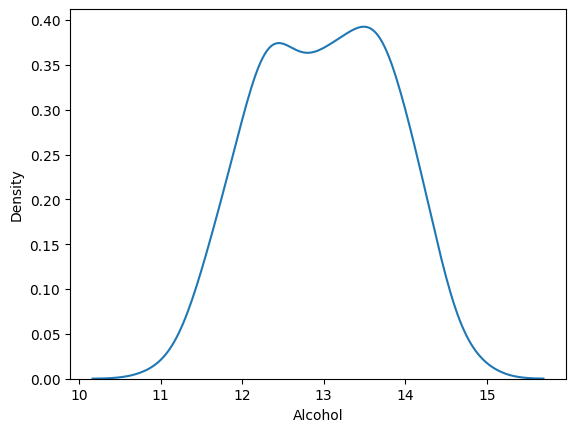

In [2]:
#plot graph
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

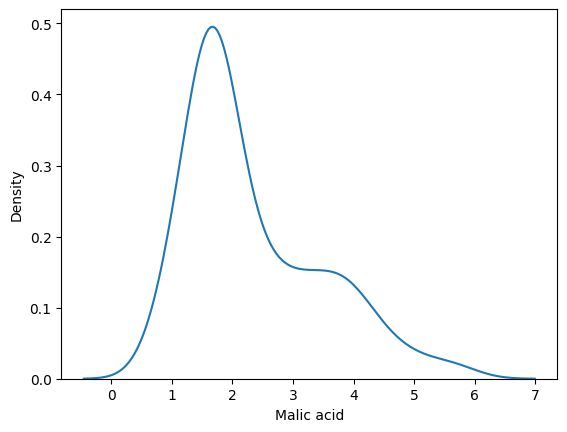

In [3]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

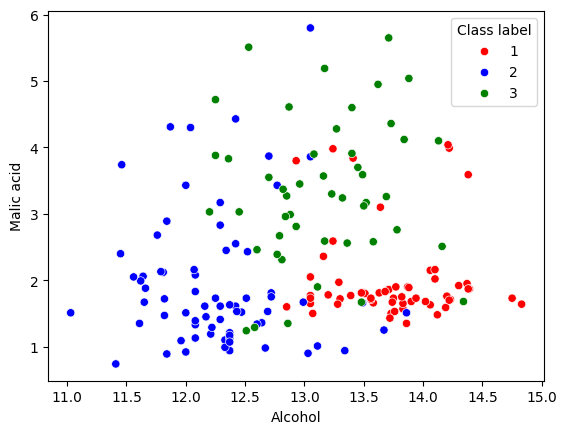

In [ ]:
color_dict={1:'red',3:'green',2:'blue'}

# Using keywords for x and y
sns.scatterplot(
    x=df['Alcohol'],
    y=df['Malic acid'],
    hue=df['Class label'],
    palette=color_dict
)

In [6]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [7]:
# Normalise data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
np.round(X_train_scaled.describe(), 1)  # we will see  nin = 0 and max =1

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


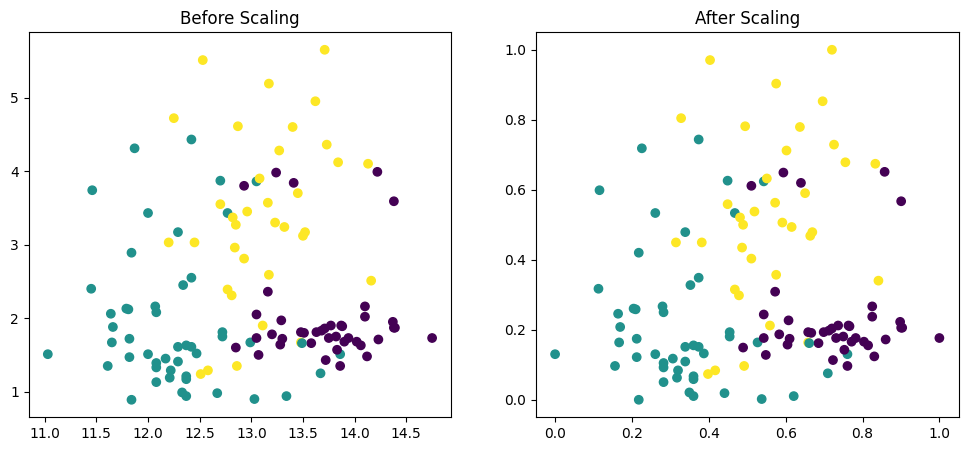

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

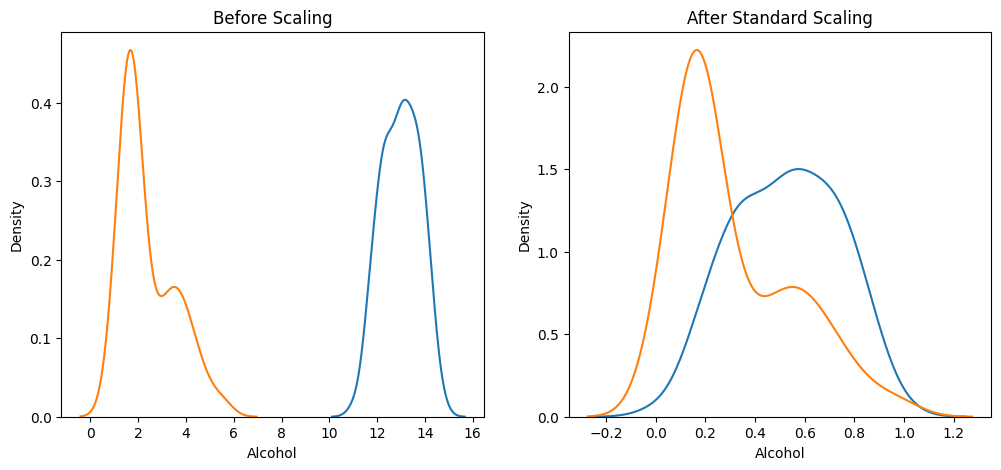

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

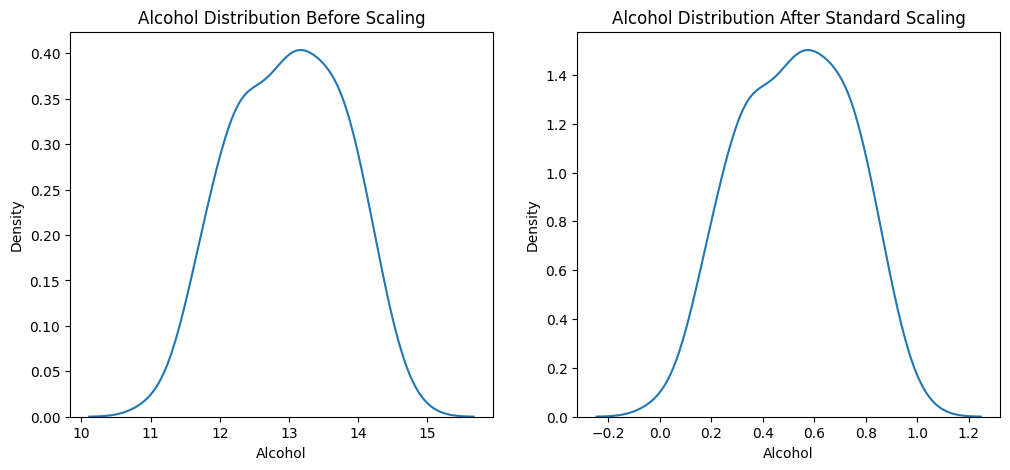

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

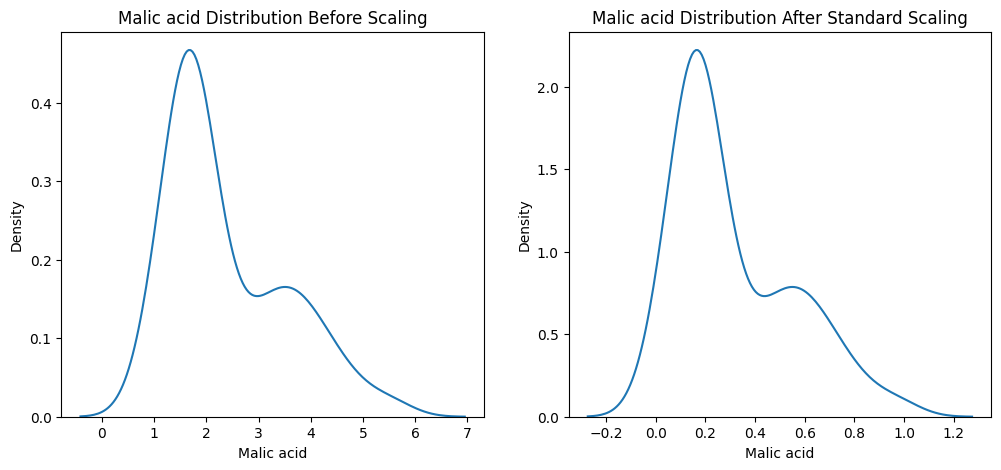

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()